In [1]:
#
# Last executed on Nike at 18.03.21.
#

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model
import tensorflow as tf
from sklearn.metrics import roc_auc_score
#np.random.seed(35)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)
print(np.min(X_train))
print(np.max(X_train))

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)
0
255


In [4]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, '5')

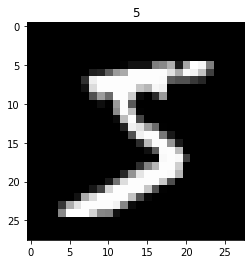

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

In [6]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255 

In [7]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [8]:
print(X_train.shape)
print(Y_test.shape)
print(X_test.shape)
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
print(X_train.shape)
print(Y_test.shape)

(60000, 784)
(10000, 10)
(10000, 784)
(60000, 28, 28, 1)
(10000, 10)


In [9]:
input_shape = (28, 28, 1)

In [10]:
def createModel():
    input_img = Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_img)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x) 
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)    
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)    
    x = tf.keras.layers.Dropout(0.5)(x)    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)    
    output = tf.keras.layers.Dense(10, activation='softmax', name='visualized_layer')(x)

    def auc(y_true, y_pred):
        return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)
    
    model = Model(inputs=input_img, outputs=output)
    return model

In [11]:
model = createModel()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
size = int(len(X_train) * 0.8)
train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]
print(train_x.shape)

(48000, 28, 28, 1)


In [21]:
history = model.fit(train_x, train_y, batch_size=128, nb_epoch=10, validation_data=(val_x, val_y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 249us/sample - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0377 - val_accuracy: 0.9897
Epoch 2/10
48000/48000 [==============================] - 12s 251us/sample - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.0352 - val_accuracy: 0.9894
Epoch 3/10
48000/48000 [==============================] - 12s 254us/sample - loss: 0.0466 - accuracy: 0.9846 - val_loss: 0.0356 - val_accuracy: 0.9907
Epoch 4/10
48000/48000 [==============================] - 12s 256us/sample - loss: 0.0405 - accuracy: 0.9865 - val_loss: 0.0372 - val_accuracy: 0.9895
Epoch 5/10
48000/48000 [==============================] - 13s 263us/sample - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0304 - val_accuracy: 0.9908
Epoch 6/10
48000/48000 [==============================] - 20s 414us/sample - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.0328 - val_accuracy: 0.9906
Epoch 7/10
48000/48000 [====================

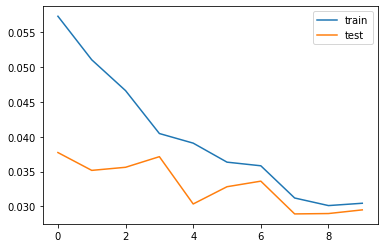

In [22]:
from matplotlib import pyplot
# learning curves of model accuracy
pyplot.plot(history.history['loss'], label='Training')
pyplot.plot(history.history['val_loss'], label='Validation')
pyplot.legend()
pyplot.show()

In [23]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy:  0.9914
